## EDA SIVIGILA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",999)

Here we are going to explore the data about confirmed cases of different diseases provided by the government institution SIVIGILA for the years 2017 and 2018. The data was dispersed in various csv files and was cleaned and merged in another notebook.

In [2]:
data=pd.read_parquet('../parquet_datasets/sivigila_2017_2018.parquet')

In [3]:
data

,index,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,SEXO,COD_PAIS_O,COD_DPTO_O,COD_MUN_O,AREA,LOCALIDAD,CEN_POBLA,VEREDA,OCUPACION,TIP_SS,COD_ASE,PER_ETN,GRU_POB,GP_DISCAPA,GP_DESPLAZ,GP_MIGRANT,GP_CARCELA,GP_GESTAN,GP_INDIGEN,GP_POBICFB,GP_MAD_COM,GP_DESMOVI,GP_PSIQUIA,GP_VIC_VIO,GP_OTROS,COD_DPTO_R,COD_MUN_R,COD_DPTO_N,COD_MUN_N,FEC_CON,INI_SIN,TIP_CAS,PAC_HOS,FEC_HOS,CON_FIN,FEC_DEF,AJUSTE,FECHA_NTO,CER_DEF,CBMTE,FEC_ARC_XL,FEC_AJU,FM_FUERZA,FM_UNIDAD,FM_GRADO,confirmados,Evento,Departamento_ocurrencia,Municipio_ocurrencia,Departamento_residencia,Municipio_residencia,est_f_caso,nom_est_f_caso
0,0,5429581,205,2017-08-28,31,2017,1100109111,1,46,1,M,170,54,810,1,SIN DATO,SIN DATO,SIN DATO,130,P,RES003,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,54,810,11,11001,2017-08-01,2017-08-01,3,1,2017-08-01,1,None,0,1971-01-27,NaN,None,2018-04-12,2017-08-28,NaN,nan,nan,1,CHAGAS,NORTE SANTANDER,TIBU,NORTE SANTANDER,TIBU,3.0,Confirmado por laboratorio
1,1,5429832,205,2017-05-10,2,2017,1100109111,1,87,1,F,170,15,469,1,SIN DATO,SIN DATO,SIN DATO,9950,C,EPS003,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2017-04-12,2017-01-10,3,1,2017-04-12,1,None,0,1929-09-28,NaN,None,2018-04-12,2017-05-10,NaN,nan,nan,1,CHAGAS,BOYACA,MONIQUIRA,BOGOTA,BOGOTA,3.0,Confirmado por laboratorio
2,2,5423281,205,2017-09-08,33,2017,1100109111,1,58,1,F,170,73,148,3,SIN DATO,SIN DATO,VDA SIBERIA BAJA,9996,S,EPSS41,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,73,148,11,11001,2017-08-19,2017-08-14,3,1,2017-08-19,1,None,0,1959-03-29,NaN,None,2018-04-12,2017-09-08,NaN,nan,nan,1,CHAGAS,TOLIMA,CARMEN DE APICALA,TOLIMA,CARMEN DE APICALA,3.0,Confirmado por laboratorio
3,3,5422421,205,2017-08-16,28,2017,1100109111,1,68,1,F,170,68,773,1,SIN DATO,SIN DATO,SIN DATO,9996,C,EPS037,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,25,899,11,11001,2017-07-21,2017-07-11,3,1,2017-07-21,1,None,0,1948-08-17,NaN,None,2018-04-12,2017-08-16,NaN,nan,nan,1,CHAGAS,SANTANDER,SUCRE,CUNDINAMARCA,ZIPAQUIRA,3.0,Confirmado por laboratorio
4,4,5422463,205,2017-10-27,8,2017,1100109111,1,70,1,F,170,25,815,1,SIN DATO,SIN DATO,SIN DATO,9996,C,EPS037,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2017-10-09,2017-02-25,3,1,2017-10-09,1,None,0,1946-11-17,NaN,None,2018-04-12,2017-10-27,NaN,nan,nan,1,CHAGAS,CUNDINAMARCA,TOCAIMA,BOGOTA,BOGOTA,3.0,Confirmado por laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141005,817,5809260,895,2018-07-10,28,2018,7600100037,5,36,1,M,170,76,1,1,SIN DATO,SIN DATO,None,9999,C,EPS018,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,76,1,76,76001,2018-07-10,2018-07-08,4,2,None,1,None,0,1982-07-08,NaN,None,2019-05-08,2018-07-11,NaN,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141006,818,5849493,895,2018-09-24,39,2018,7600100037,5,51,1,M,170,76,1,1,SIN DATO,SIN DATO,None,9999,C,EPS018,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,76,1,76,76001,2018-09-24,2018-09-23,4,2,None,1,None,0,1967-08-15,NaN,None,2019-05-08,2018-09-25,NaN,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141007,819,5849495,895,2018-05-16,19,2018,7600100037,5,38,1,F,170,76,1,1,SIN DATO,SIN DATO,None,9999,C,EPS018,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,76,1,76,76001,2018-05-16,2018-05-07,4,2,None,1,None,0,1980-01-26,NaN,None,2019-05-08,2018-05-17,NaN,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141008,820,5849496,895,2019-03-27,28,2018,7600105817,1,47,1,M,170,76,1,1,SIN DATO,SIN DATO,None,9999,C,EPS012,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,76,1,76,76001,2018-07-16,2018-07-14,1,2,None,1,None,4,1971-07-05,NaN,None,2019-05-08,2019-03-27,NaN,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica


In [4]:
data[data.Departamento_ocurrencia== 'EXTERIOR']

,index,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,SEXO,COD_PAIS_O,COD_DPTO_O,COD_MUN_O,AREA,LOCALIDAD,CEN_POBLA,VEREDA,OCUPACION,TIP_SS,COD_ASE,PER_ETN,GRU_POB,GP_DISCAPA,GP_DESPLAZ,GP_MIGRANT,GP_CARCELA,GP_GESTAN,GP_INDIGEN,GP_POBICFB,GP_MAD_COM,GP_DESMOVI,GP_PSIQUIA,GP_VIC_VIO,GP_OTROS,COD_DPTO_R,COD_MUN_R,COD_DPTO_N,COD_MUN_N,FEC_CON,INI_SIN,TIP_CAS,PAC_HOS,FEC_HOS,CON_FIN,FEC_DEF,AJUSTE,FECHA_NTO,CER_DEF,CBMTE,FEC_ARC_XL,FEC_AJU,FM_FUERZA,FM_UNIDAD,FM_GRADO,confirmados,Evento,Departamento_ocurrencia,Municipio_ocurrencia,Departamento_residencia,Municipio_residencia,est_f_caso,nom_est_f_caso
110,110,5423311,205,2017-09-14,35,2017,5400100371,1,5,1,M,862,1,862,1,ESTADO TACHIRA,SIN DATO,SIN DATO,9999,N,None,6,NaN,2,2,1,2,2,2,2,2,2,2,2,2,1,862,54,54001,2017-09-13,2017-08-28,3,1,2017-09-13,1,None,0,2011-12-18,NaN,None,2018-04-12,2017-09-14,NaN,nan,nan,1,CHAGAS,EXTERIOR,EXTERIOR_VENEZUELA,EXTERIOR,EXTERIOR_VENEZUELA,3.0,Confirmado por laboratorio
271,271,4954294,205,2017-06-30,9,2017,9400170000,0,33,1,F,862,1,862,3,SIN DATO,SIN DATO,SIN DATO,3415,S,EPSI05,1,NaN,2,2,2,2,2,2,2,2,2,2,2,1,94,1,94,94001,2017-03-13,2017-02-28,3,2,None,1,None,0,1983-11-07,NaN,None,2018-04-12,2017-07-04,NaN,nan,nan,1,CHAGAS,EXTERIOR,EXTERIOR_VENEZUELA,GUAINIA,PUERTO INIRIDA,3.0,Confirmado por laboratorio
374,75,4993244,217,2017-02-07,4,2017,1100105868,10,38,1,M,218,1,218,1,SIN DATO,SIN DATO,SIN DATO,2145,C,EPS008,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2017-01-30,2017-01-26,4,2,None,1,None,3,1978-10-06,NaN,None,2018-04-04,2017-08-10,NaN,nan,nan,1,CHIKUNGUNYA,EXTERIOR,EXTERIOR_ECUADOR,BOGOTA,BOGOTA,3.0,Confirmado por laboratorio
456,157,4993867,217,2017-09-17,36,2017,1100107782,9,52,1,F,630,1,630,2,SIN DATO,SAN JUAN,SIN DATO,2226,C,EPS010,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2017-09-17,2017-09-09,1,2,None,1,None,0,1965-08-27,NaN,None,2018-04-04,2017-09-18,NaN,nan,nan,0,CHIKUNGUNYA,EXTERIOR,EXTERIOR_PUERTO RICO,BOGOTA,BOGOTA,1.0,Sospechoso
468,169,4993646,217,2017-09-04,35,2017,1100107782,9,36,1,M,862,1,862,2,SIN DATO,PUERTO DE LA CRUZ,SIN DATO,1412,C,EPS010,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2017-09-04,2017-09-02,1,2,None,1,None,0,1980-12-18,NaN,None,2018-04-04,2017-09-06,NaN,nan,nan,0,CHIKUNGUNYA,EXTERIOR,EXTERIOR_VENEZUELA,BOGOTA,BOGOTA,1.0,Sospechoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140394,206,5809437,895,2018-02-23,7,2018,1300100815,1,15,1,F,862,1,862,1,TURBACO,SIN DATO,None,9996,N,None,6,NaN,2,2,2,2,1,2,2,2,2,2,2,2,13,836,13,13001,2018-02-17,2018-02-16,1,1,2018-02-17,1,None,0,2003-02-23,NaN,None,2019-05-08,2018-03-26,NaN,nan,nan,0,ZIKA,EXTERIOR,EXTERIOR_VENEZUELA,BOLIVAR,TURBACO,1.0,Sospechoso
140395,207,5809525,895,2018-09-19,37,2018,5000100529,1,1,2,M,862,1,862,3,SIN DATO,SIN DATO,None,9999,N,None,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,81,1,50,50001,2018-09-15,2018-09-15,1,1,2018-09-15,1,None,0,2018-07-31,NaN,None,2019-05-08,2018-09-19,NaN,nan,nan,0,ZIKA,EXTERIOR,EXTERIOR_VENEZUELA,ARAUCA,ARAUCA,1.0,Sospechoso
140396,208,5809439,895,2018-02-01,5,2018,1100108679,1,37,1,F,862,1,862,2,SIN DATO,TERRAZA DEL CLUBITIC,None,2221,C,EPS008,6,NaN,2,2,2,2,1,2,2,2,2,2,2,2,11,1,11,11001,2018-02-01,2018-02-01,1,1,2018-02-01,1,None,0,1980-12-09,NaN,None,2019-05-08,2018-03-02,NaN,nan,nan,0,ZIKA,EXTERIOR,EXTERIOR_VENEZUELA,BOGOTA,BOGOTA,1.0,Sospechoso
140397,209,5809631,895,2018-04-24,16,2018,1100108679,1,6,3,F,862,1,862,1,CARACAS,SIN DATO,None,9999,C,EPS008,6,NaN,2,2,2,2,2,2,2,2,2,2,2,1,11,1,11,11001,2018-04-19,2018-04-19,1,1,2018-04-19,1,None,0,2018-04-19,NaN,None,2019-05-08,2018-08-10,NaN,nan,nan,0,ZIKA,EXTERIOR,EXTERIOR_VENEZUELA,BOGOTA,BOGOTA,1.0,Sospechoso


In [5]:
data=data[~(data.Departamento_ocurrencia =='PROCEDENCIA DESCONOCIDA')]
data=data[~(data.Departamento_ocurrencia =='EXTERIOR')]

In [6]:
data.nom_est_f_caso.unique()

array(['Confirmado por laboratorio', 'Confirmado por Cl¡nica',
       'Sospechoso', None, 'Confirmado por Clínica', 'Probable',
       'Descartado'], dtype=object)

In [7]:
# data['sospechoso']=
data['total']= pd.Series([1 for x in data.nom_est_f_caso ])

In [8]:
data.columns

Index(['index', 'CONSECUTIVE', 'COD_EVE', 'FEC_NOT', 'SEMANA', 'ANO',
       'COD_PRE', 'COD_SUB', 'EDAD', 'UNI_MED', 'SEXO', 'COD_PAIS_O',
       'COD_DPTO_O', 'COD_MUN_O', 'AREA', 'LOCALIDAD', 'CEN_POBLA', 'VEREDA',
       'OCUPACION', 'TIP_SS', 'COD_ASE', 'PER_ETN', 'GRU_POB', 'GP_DISCAPA',
       'GP_DESPLAZ', 'GP_MIGRANT', 'GP_CARCELA', 'GP_GESTAN', 'GP_INDIGEN',
       'GP_POBICFB', 'GP_MAD_COM', 'GP_DESMOVI', 'GP_PSIQUIA', 'GP_VIC_VIO',
       'GP_OTROS', 'COD_DPTO_R', 'COD_MUN_R', 'COD_DPTO_N', 'COD_MUN_N',
       'FEC_CON', 'INI_SIN', 'TIP_CAS', 'PAC_HOS', 'FEC_HOS', 'CON_FIN',
       'FEC_DEF', 'AJUSTE', 'FECHA_NTO', 'CER_DEF', 'CBMTE', 'FEC_ARC_XL',
       'FEC_AJU', 'FM_FUERZA', 'FM_UNIDAD', 'FM_GRADO', 'confirmados',
       'Evento', 'Departamento_ocurrencia', 'Municipio_ocurrencia',
       'Departamento_residencia', 'Municipio_residencia', 'est_f_caso',
       'nom_est_f_caso', 'total'],
      dtype='object')

For our analysis our interest is focused on identifying the different infectious diseases and their distribution over the different Departments and the change over time
With this in mind our columns of interest are: `Evento` which relates the disease, `Departamento_ocurrencia` relating the department where the disease was contracted, `year` separating the data in the two available years `2017` and `2018` and `confirmados` relating the amount of people presenting the symptoms of the specific disease

In [9]:
data_group_evento=data.groupby(['Evento','ANO']).agg({'confirmados':'sum'}).reset_index().sort_values(by=['confirmados'], ascending= False)
data_group_evento

,Evento,ANO,confirmados
19,MALARIA FALCIPARUM,2018,29642
18,MALARIA FALCIPARUM,2017,29558
21,MALARIA VIVAX,2018,29552
20,MALARIA VIVAX,2017,22132
8,LEISHMANIASIS CUTANEA,2017,7653
9,LEISHMANIASIS CUTANEA,2018,6273
22,ZIKA,2017,1749
6,INFECCION RESPIRATORIA AGUDA GRAVE IRAG INUSITADA,2017,1342
15,MALARIA ASOCIADA (FORMAS MIXTAS),2018,1148
14,MALARIA ASOCIADA (FORMAS MIXTAS),2017,1115


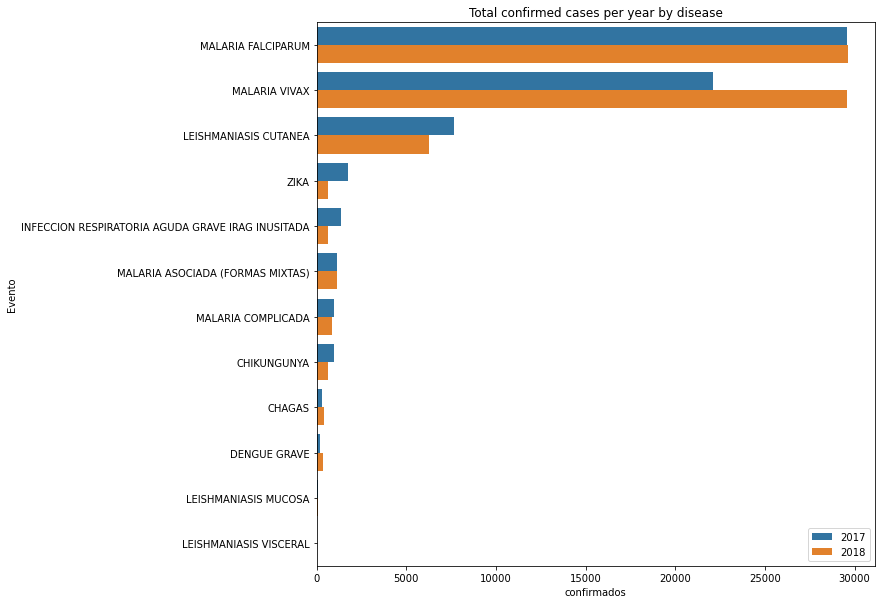

In [10]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=data_group_evento, y="Evento", x="confirmados",hue="ANO")
plt.legend(loc='lower right')
plt.title('Total confirmed cases per year by disease')
plt.savefig('../images/Total_confirmed_cases_per_year_by_disease.jpg', dpi=600, bbox_inches='tight', pad_inches=0.3)    

In the graph we can see that the predominant disease is `MALARIA VIVAX`, additionally an increase of approximately 8000 cases is seen between `2017` and `2018`

In [11]:
data_group_department=data.groupby(['Departamento_ocurrencia','ANO']).agg({'confirmados':'sum'}).reset_index().sort_values(by=['confirmados'], ascending= False)

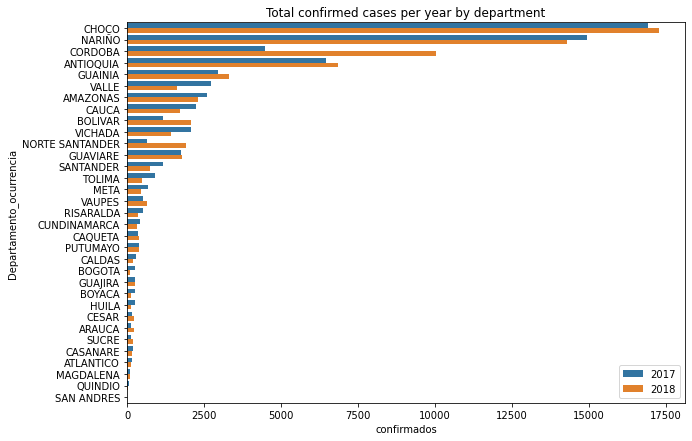

In [12]:
fig = plt.figure(figsize=(10,7))
sns.barplot(data=data_group_department, y="Departamento_ocurrencia", x="confirmados",hue="ANO")
plt.legend(loc='lower right')
plt.title('Total confirmed cases per year by department')
plt.savefig('../images/Total_confirmed_cases_per_year_by_department.jpg', dpi=600, bbox_inches='tight', pad_inches=0.3)   

In [13]:
data_group_department_evento=data.groupby(['Departamento_ocurrencia','ANO','Evento']).agg({'confirmados':'sum'}).\
                                            reset_index().sort_values(by=['confirmados'], ascending= False)

In [14]:
# g = sns.catplot(data=data_group_department_evento, x='confirmados', y='Departamento_ocurrencia', hue='ANO', row='Evento',
#                 kind='bar', sharex=False, sharey= False, height=5, aspect=2)

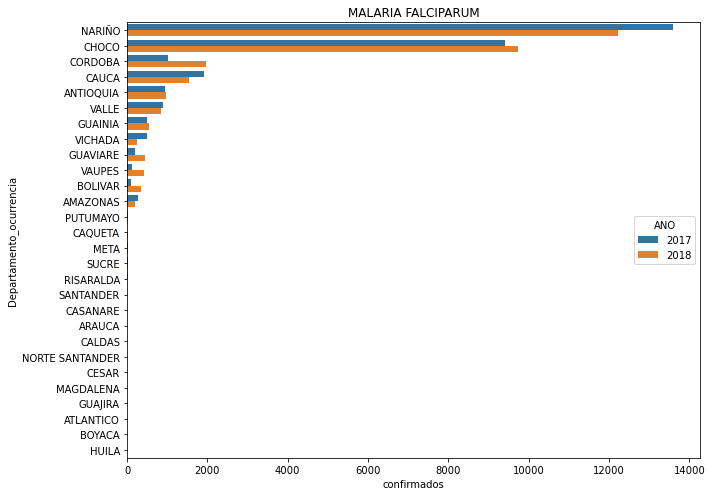

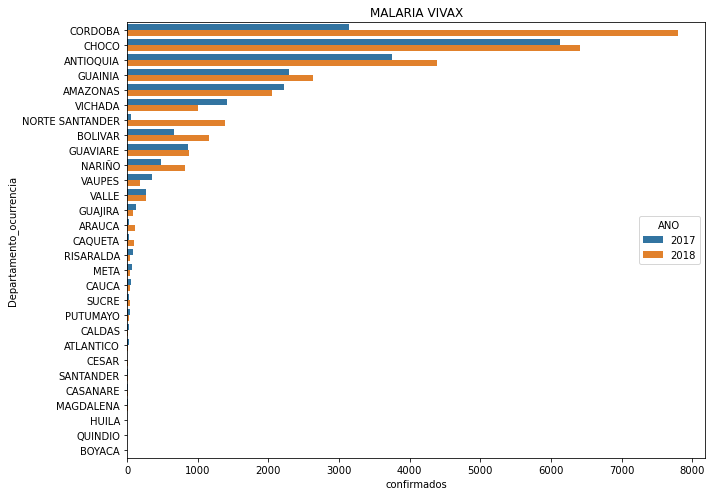

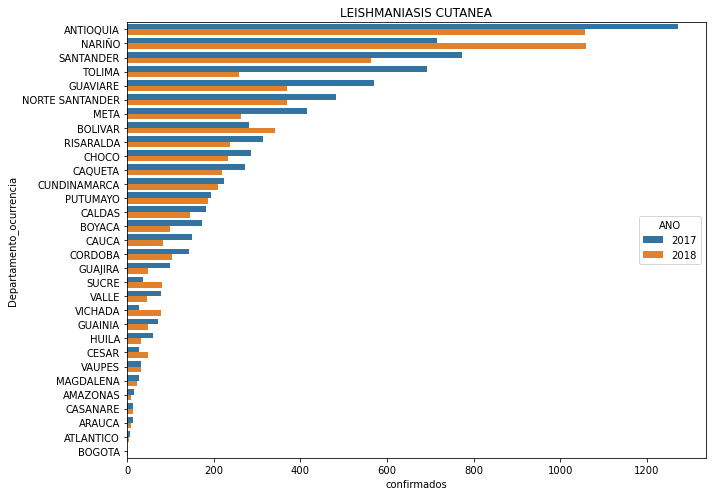

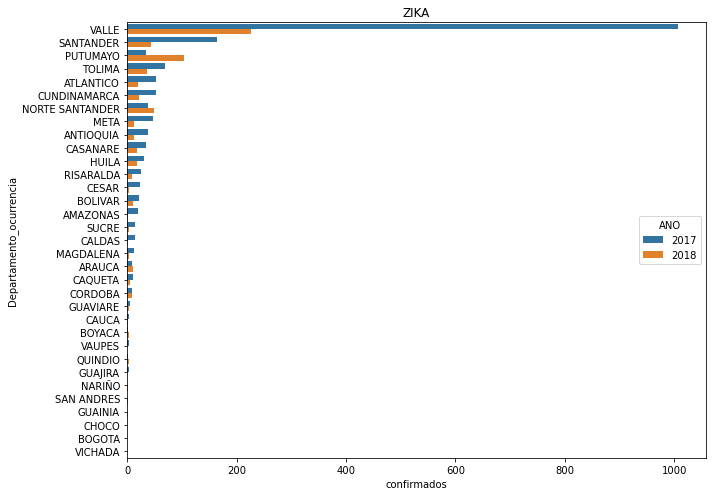

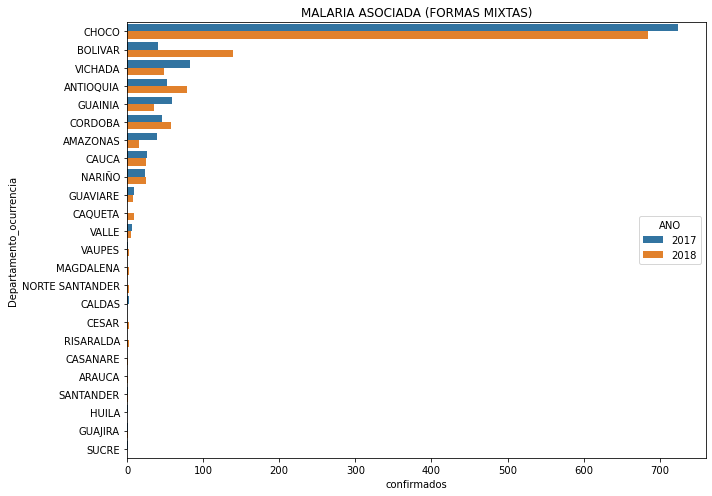

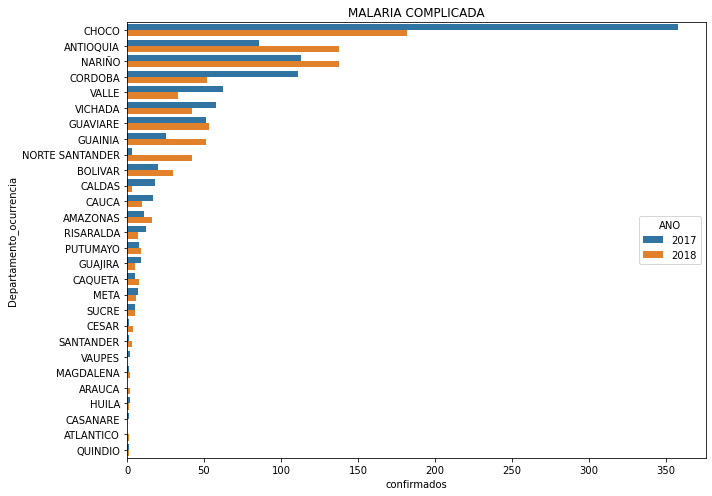

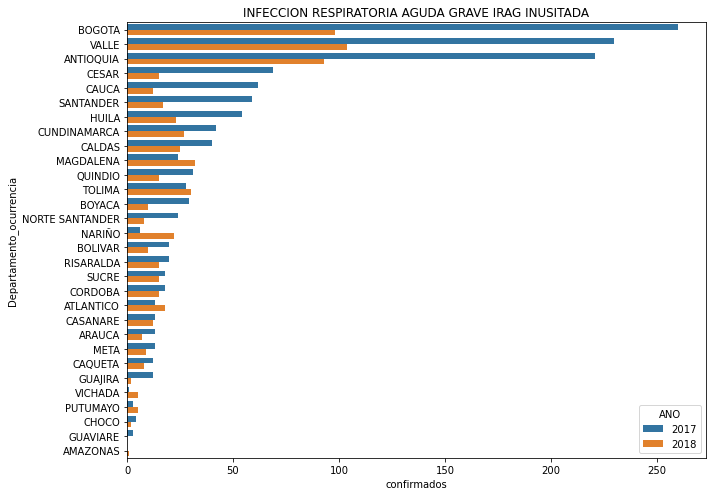

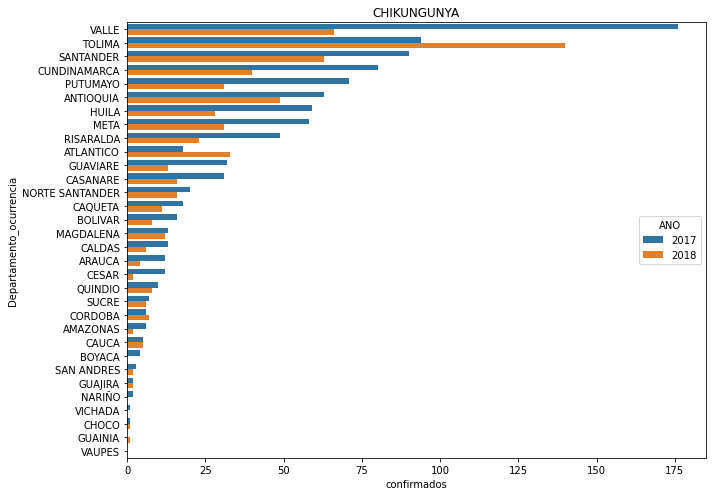

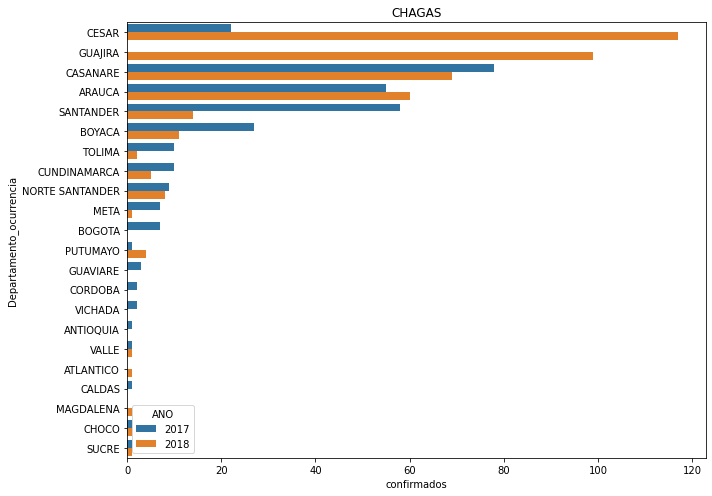

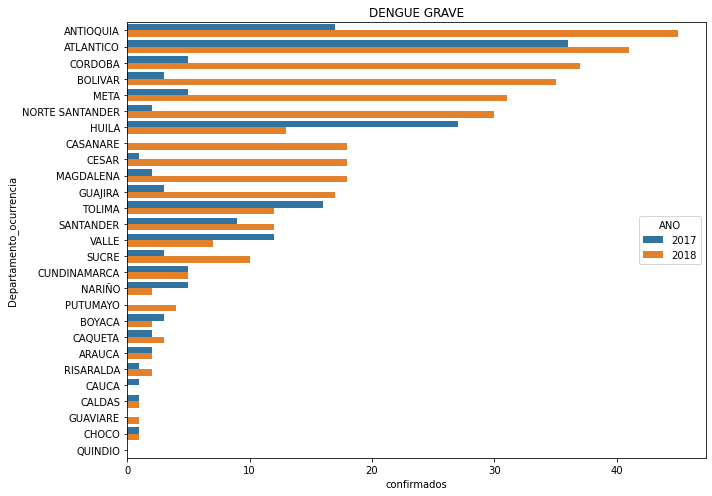

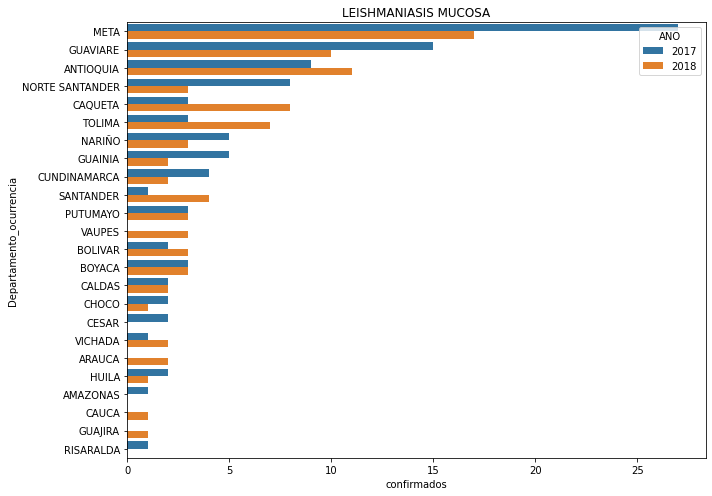

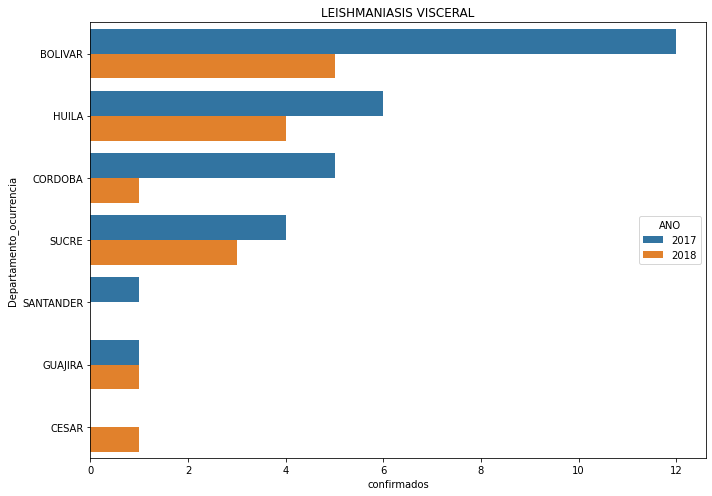

In [15]:
for i in data_group_department_evento.Evento.unique():
    fig = plt.figure(figsize=(10,7))
    sns.barplot(data=data_group_department_evento[data_group_department_evento.Evento== i],
                y="Departamento_ocurrencia", x="confirmados",hue="ANO")
    plt.title(i)
    plt.tight_layout()
    plt.savefig(f"../images/confirmados_enfermedad/{i.replace(' ', '_').swapcase()}.jpg", dpi=300) 

In [16]:
data_export=data[['Departamento_ocurrencia','Evento','FEC_NOT','EDAD', 'SEXO']]

In [17]:
data_export.columns = ['DEPARTAMENTO','ENFERMEDAD','FECHA','EDAD','SEXO']

In [18]:
data_export = data_export.assign(FECHA=pd.to_datetime(pd.to_datetime(data_export['FECHA']).dt.to_period('M').astype(str)))

In [19]:
sorted(list(data_export.DEPARTAMENTO.unique()))

['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTA',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAINIA',
 'GUAJIRA',
 'GUAVIARE',
 'HUILA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SAN ANDRES',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES',
 'VICHADA']

In [20]:
data_export

,DEPARTAMENTO,ENFERMEDAD,FECHA,EDAD,SEXO
0,NORTE SANTANDER,CHAGAS,2017-08-01,46,M
1,BOYACA,CHAGAS,2017-05-01,87,F
2,TOLIMA,CHAGAS,2017-09-01,58,F
3,SANTANDER,CHAGAS,2017-08-01,68,F
4,CUNDINAMARCA,CHAGAS,2017-10-01,70,F
...,...,...,...,...,...
141005,VALLE,ZIKA,2018-07-01,36,M
141006,VALLE,ZIKA,2018-09-01,51,M
141007,VALLE,ZIKA,2018-05-01,38,F
141008,VALLE,ZIKA,2019-03-01,47,M


In [21]:
data_export

,DEPARTAMENTO,ENFERMEDAD,FECHA,EDAD,SEXO
0,NORTE SANTANDER,CHAGAS,2017-08-01,46,M
1,BOYACA,CHAGAS,2017-05-01,87,F
2,TOLIMA,CHAGAS,2017-09-01,58,F
3,SANTANDER,CHAGAS,2017-08-01,68,F
4,CUNDINAMARCA,CHAGAS,2017-10-01,70,F
...,...,...,...,...,...
141005,VALLE,ZIKA,2018-07-01,36,M
141006,VALLE,ZIKA,2018-09-01,51,M
141007,VALLE,ZIKA,2018-05-01,38,F
141008,VALLE,ZIKA,2019-03-01,47,M


In [22]:
data_export.dtypes

DEPARTAMENTO            object
ENFERMEDAD              object
FECHA           datetime64[ns]
EDAD                     int64
SEXO                    object
dtype: object

In [23]:
data_export.EDAD.unique()

array([ 46,  87,  58,  68,  70,  66,  53,  60,  54,  52,  34,  33,  65,
        38,  37,  27,  73,  62,  40,  51,  86,  72,  47,  80,  22,  29,
        32,  36,  24,  77,  63,  41,  61,  57,  81,  76,  35,  18,  44,
        31,  49,  74,  67,  43,  45,  48,  69,  64,  56,  84,   7,  39,
        59,  55,  75,  11,   5,  50,  42,   6,  15,  28,  20,  23,   4,
        25,   1,  30,  17,   8,  21,  14,  83,  71,  19,   2,  10,   3,
         9,  16,  12,  26,  13,  79,  78,  91,  92,  89,  94,  88,  82,
        85,  90,  93,  96,  95, 106, 108, 122, 104, 102, 107, 109, 121,
       111, 101,  97, 123, 116, 118, 132])

In [24]:
data_export.DEPARTAMENTO=data_export.DEPARTAMENTO.astype('category')
data_export.ENFERMEDAD=data_export.ENFERMEDAD.astype('category')
data_export.EDAD=data_export.EDAD.astype('int16')
data_export.SEXO=data_export.SEXO.astype('category')

In [25]:
data_export.dtypes

DEPARTAMENTO          category
ENFERMEDAD            category
FECHA           datetime64[ns]
EDAD                     int16
SEXO                  category
dtype: object

In [26]:
data_export.to_parquet('../parquet_datasets/sivigila_2017_2018_S.parquet')